In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Building the `MLP` model

In [ ]:
class Neural_Network():
  def __init__(self,input_layer,hidden_layer,output_layer,learning_rate=0.01,epochs=1000):
    self.input_layer = input_layer
    self.hidden_layer = hidden_layer
    self.output_layer = output_layer
    self.learning_rate = learning_rate
    self.epochs = epochs

    #### Initialize the weights and biases########
       #################################
        # INPUT LAYER TO HIDDEN LAYER #
        #################################
    self.W1 = np.random.randn(self.input_layer,self.hidden_layer)*0.01
    self.b1 = np.zeros((1,self.hidden_layer))

       #################################
        # HIDDEN LAYER TO OUTPUT LAYER #
        #################################
    self.W2 = np.random.randn(self.hidden_layer,self.output_layer)*0.01
    self.b2 = np.zeros((1,self.output_layer))


    # COST & HISTORY FOR PLOTTING #

    self.loss_history = []
    self.accuracy_history = []

    ## ADD Activation function ##
    #1. ReLU Activation Function

  def relu_function(self,z):
      return np.maximum(0,z)

  ##### Derivative of ReLU for backpropagation
  def relu_derivative(self,z):
      return np.where(z>0,1,0)

  ##### SoftMax Function ####
  def softmax(self,z):
    exp_value = np.exp(z-np.max(z,axis=1,keepdims=True))
    return exp_value/np.sum(exp_value,axis=1,keepdims=True)


    ###############################
        # FORWARD PROPAGATION
    ##############################

  def forward(self,x):


      ###############################
        # INPUT TO HIDDEN LAYER
      ##############################
    self.z1 = np.dot(x,self.W1) + self.b1
    self.a1 = self.relu_function(self.z1)


      ###############################
        # Hideen TO output LAYER
      ##############################

    self.z2 = np.dot(self.a1 , self.W2) + self.b2
    self.prob = self.softmax(self.z2)

    return self.prob

      ###############################
        # COMPUTE COST
      ##############################
  def compute_cost(self,y_true,prob):
      loss = -np.mean(np.sum(y_true * np.log(prob),axis=1))
      return loss
      ###############################
        # COMPUTE ACCURACY
      ##############################

  def accuracy(self,y_true,prob):
        y_pred = np.argmax(prob,axis=1)
        y_true = np.argmax(y_true,axis=1)
        accuracy = np.mean(y_pred == y_true)
        return accuracy

         ###############################
         # BACKWARD PROPAGATION
         ##############################
  def backward(self,x,y):
          m = x.shape[0]

          delta3 = self.prob - y
          dW2 = (1/m) * np.dot(self.a1.T,delta3)
          db2 = (1/m) * np.sum(delta3,axis=0,keepdims=True)


          delta2 = np.dot(delta3,self.W2.T) * self.relu_derivative(self.z1)
          dW1 = (1/m) * np.dot(x.T,delta2)
          db1 = (1/m) * np.sum(delta2,axis=0,keepdims=True)


          ###############################
          # UPDATE WEIGHT & BIAS
          ##############################

          self.W1 = self.W1 - self.learning_rate * dW1
          self.b1 = self.b1 - self.learning_rate * db1
          self.W2 = self.W2 - self.learning_rate * dW2
          self.b2 = self.b2 - self.learning_rate * db2

          ###############################
          # UPDATE WEIGHT & BIAS
          ##############################

  def MLP_Train(self,x,y):
    for epoch in range(self.epochs):
            # Forward Pass
            prob = self.forward(x)

            # Compute Loss & Accuracy
            loss = self.compute_cost(y,prob)
            accuracy = self.accuracy(y,prob)

            #### 3. Store loss and accuracy values historically
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            # Backward Pass
            self.backward(x,y)

            # Print the progress after every 10 epoch
            if epoch % 10 == 0:
              print(f"Epoch: {epoch}, Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")



In [ ]:
input_layer = 4
hidden_layer = 9
output_layer = 3

Load the `IRIS`data from `Sklearn`

In [ ]:

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = pd.DataFrame(data = iris['data'],columns=iris['feature_names'])

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data['target'] = iris['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's Do encoding `One-Hat Encoding`

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
x = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
encode = OneHotEncoder(sparse_output=False)
y = encode.fit_transform(y.reshape(-1,1))

In [ ]:
y[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Spiliting the data into `Training`and `Testing`



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(120, 4)

In [ ]:
nn_iris = Neural_Network(input_layer,hidden_layer,output_layer,learning_rate=0.02,epochs=1000)

In [ ]:
nn_iris

In [ ]:
nn_iris.MLP_Train(x_train,y_train)

Epoch: 0, Loss: 1.099, Accuracy: 0.342
Epoch: 10, Loss: 1.099, Accuracy: 0.342
Epoch: 20, Loss: 1.098, Accuracy: 0.342
Epoch: 30, Loss: 1.098, Accuracy: 0.342
Epoch: 40, Loss: 1.097, Accuracy: 0.342
Epoch: 50, Loss: 1.097, Accuracy: 0.342
Epoch: 60, Loss: 1.096, Accuracy: 0.342
Epoch: 70, Loss: 1.094, Accuracy: 0.342
Epoch: 80, Loss: 1.092, Accuracy: 0.342
Epoch: 90, Loss: 1.089, Accuracy: 0.592
Epoch: 100, Loss: 1.085, Accuracy: 0.383
Epoch: 110, Loss: 1.079, Accuracy: 0.325
Epoch: 120, Loss: 1.070, Accuracy: 0.325
Epoch: 130, Loss: 1.060, Accuracy: 0.325
Epoch: 140, Loss: 1.047, Accuracy: 0.325
Epoch: 150, Loss: 1.031, Accuracy: 0.325
Epoch: 160, Loss: 1.011, Accuracy: 0.333
Epoch: 170, Loss: 0.988, Accuracy: 0.517
Epoch: 180, Loss: 0.959, Accuracy: 0.642
Epoch: 190, Loss: 0.929, Accuracy: 0.658
Epoch: 200, Loss: 0.898, Accuracy: 0.658
Epoch: 210, Loss: 0.868, Accuracy: 0.658
Epoch: 220, Loss: 0.837, Accuracy: 0.658
Epoch: 230, Loss: 0.805, Accuracy: 0.658
Epoch: 240, Loss: 0.771, Ac

### Plot the `Model Peformance Metrics` Using `Plotly`

In [ ]:
import plotly.express as px

# Ploting the  `Training Loss History` Using `Plotly`

In [ ]:
fig = px.line(x=range(len(nn_iris.loss_history)),y=nn_iris.loss_history,title='<b>Loss vs Epochs | Training</b>')
fig.update_layout(xaxis_title='<b>Epochs</b>',yaxis_title='<b>Loss</b>')
fig.update_traces(line_color='red')
fig.show()

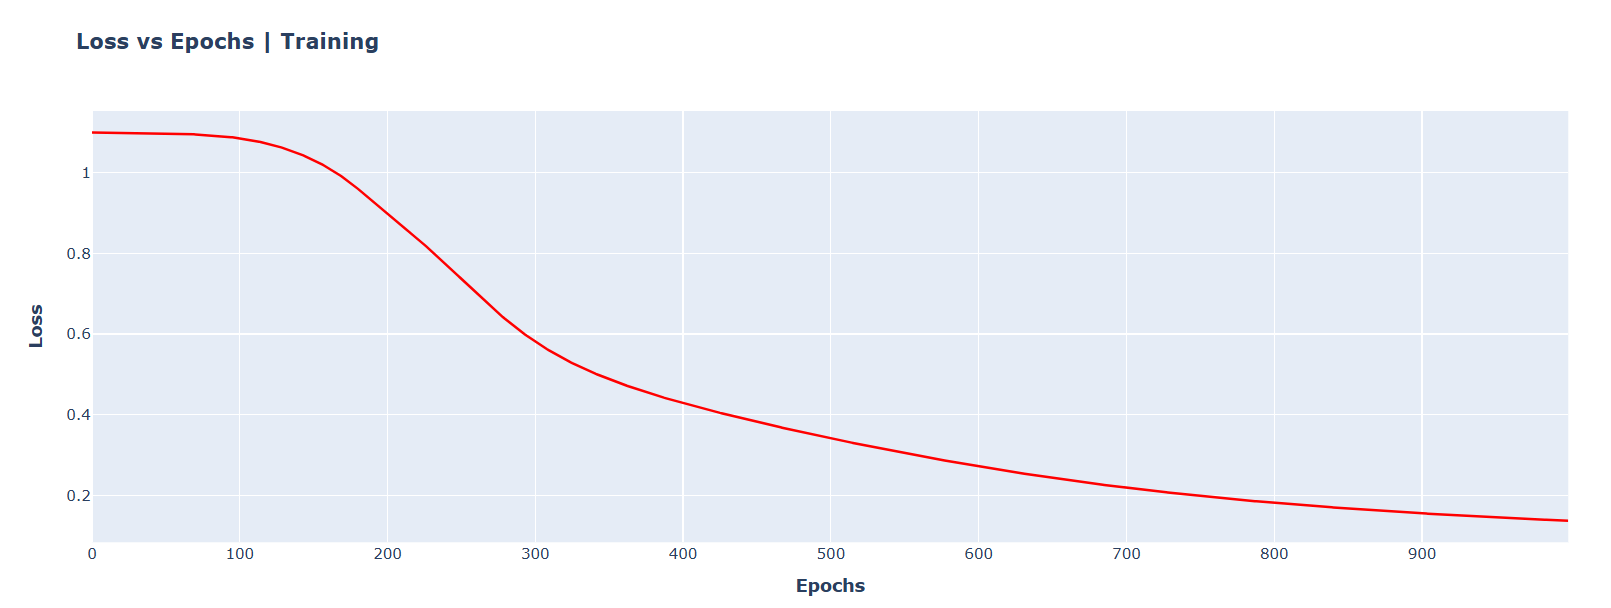

# Ploting the  `Training Accuracy History` Using `Plotly`

In [ ]:
fig = px.line(x=range(len(nn_iris.accuracy_history)),y=nn_iris.accuracy_history,title='<b>Training Accuracy vs Epochs | Training </b>')
fig.update_layout(xaxis_title='<b>Epochs</b>',yaxis_title='<b>Accuracy</b>')
fig.update_traces(line_color='green')
fig.show()

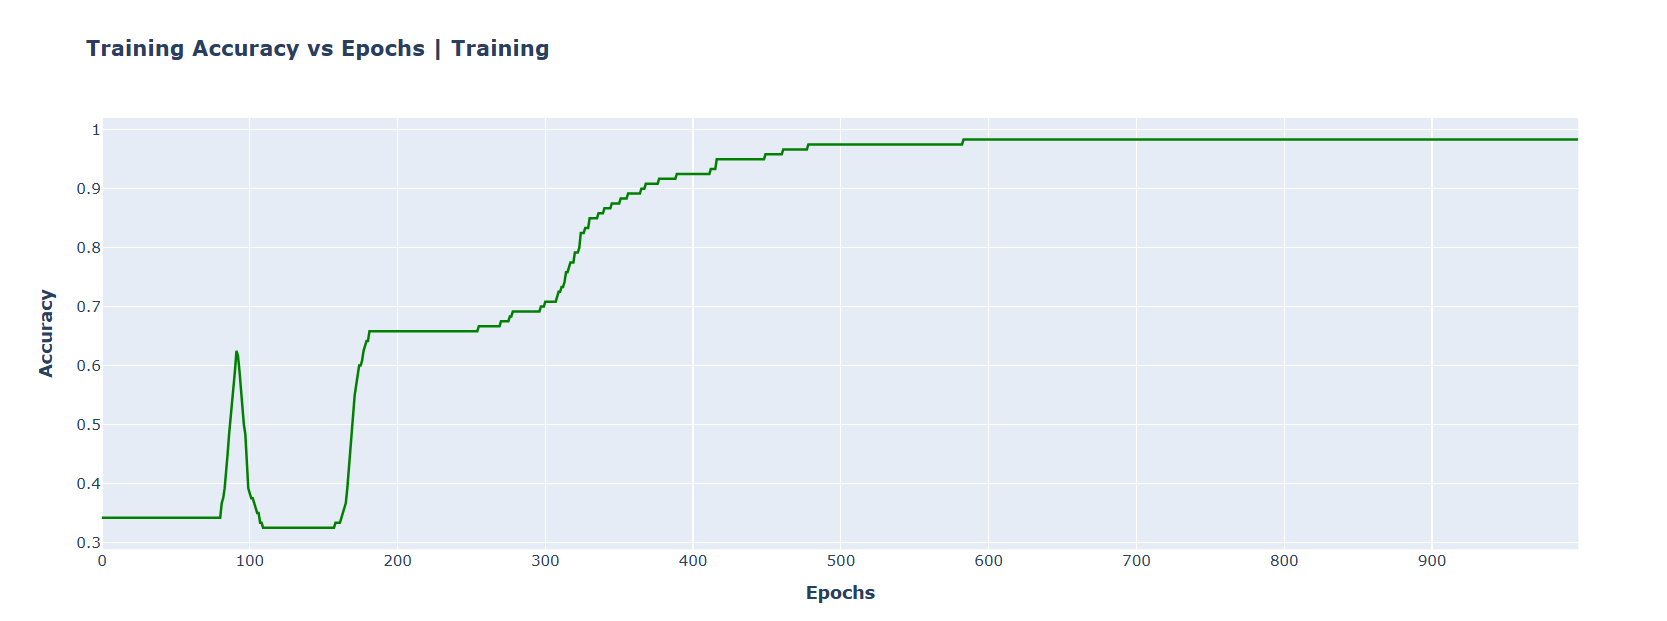

### TASK - PLS ADD THE `TESTING/VALIDATION` BLOCK

In [ ]:
input_layer = 4
hidden_layer = 9
output_layer = 3

In [ ]:
nn_test_iris = Neural_Network(input_layer,hidden_layer,output_layer,learning_rate=0.04,epochs=1000)

In [ ]:
nn_test_iris.MLP_Train(x_test,y_test)

Epoch: 0, Loss: 1.098, Accuracy: 0.367
Epoch: 10, Loss: 1.096, Accuracy: 0.367
Epoch: 20, Loss: 1.092, Accuracy: 0.367
Epoch: 30, Loss: 1.085, Accuracy: 0.367
Epoch: 40, Loss: 1.070, Accuracy: 0.367
Epoch: 50, Loss: 1.046, Accuracy: 0.367
Epoch: 60, Loss: 1.014, Accuracy: 0.367
Epoch: 70, Loss: 0.968, Accuracy: 0.367
Epoch: 80, Loss: 0.906, Accuracy: 0.700
Epoch: 90, Loss: 0.841, Accuracy: 0.700
Epoch: 100, Loss: 0.780, Accuracy: 0.700
Epoch: 110, Loss: 0.715, Accuracy: 0.700
Epoch: 120, Loss: 0.649, Accuracy: 0.700
Epoch: 130, Loss: 0.592, Accuracy: 0.700
Epoch: 140, Loss: 0.545, Accuracy: 0.700
Epoch: 150, Loss: 0.509, Accuracy: 0.700
Epoch: 160, Loss: 0.480, Accuracy: 0.733
Epoch: 170, Loss: 0.455, Accuracy: 0.767
Epoch: 180, Loss: 0.435, Accuracy: 0.800
Epoch: 190, Loss: 0.417, Accuracy: 0.800
Epoch: 200, Loss: 0.400, Accuracy: 0.800
Epoch: 210, Loss: 0.385, Accuracy: 0.833
Epoch: 220, Loss: 0.371, Accuracy: 0.867
Epoch: 230, Loss: 0.357, Accuracy: 0.900
Epoch: 240, Loss: 0.344, Ac

# Ploting the  `Testing Loss History` Using `Plotly`

In [ ]:
fig = px.line(x=range(len(nn_test_iris.loss_history)),y=nn_test_iris.loss_history,title='<b>Loss vs Epochs | Testing</b>')
fig.update_layout(xaxis_title='<b>Epochs</b>',yaxis_title='<b>Loss</b>',paper_bgcolor= 'lightgray')
fig.update_traces(line_color='red')
fig.show()

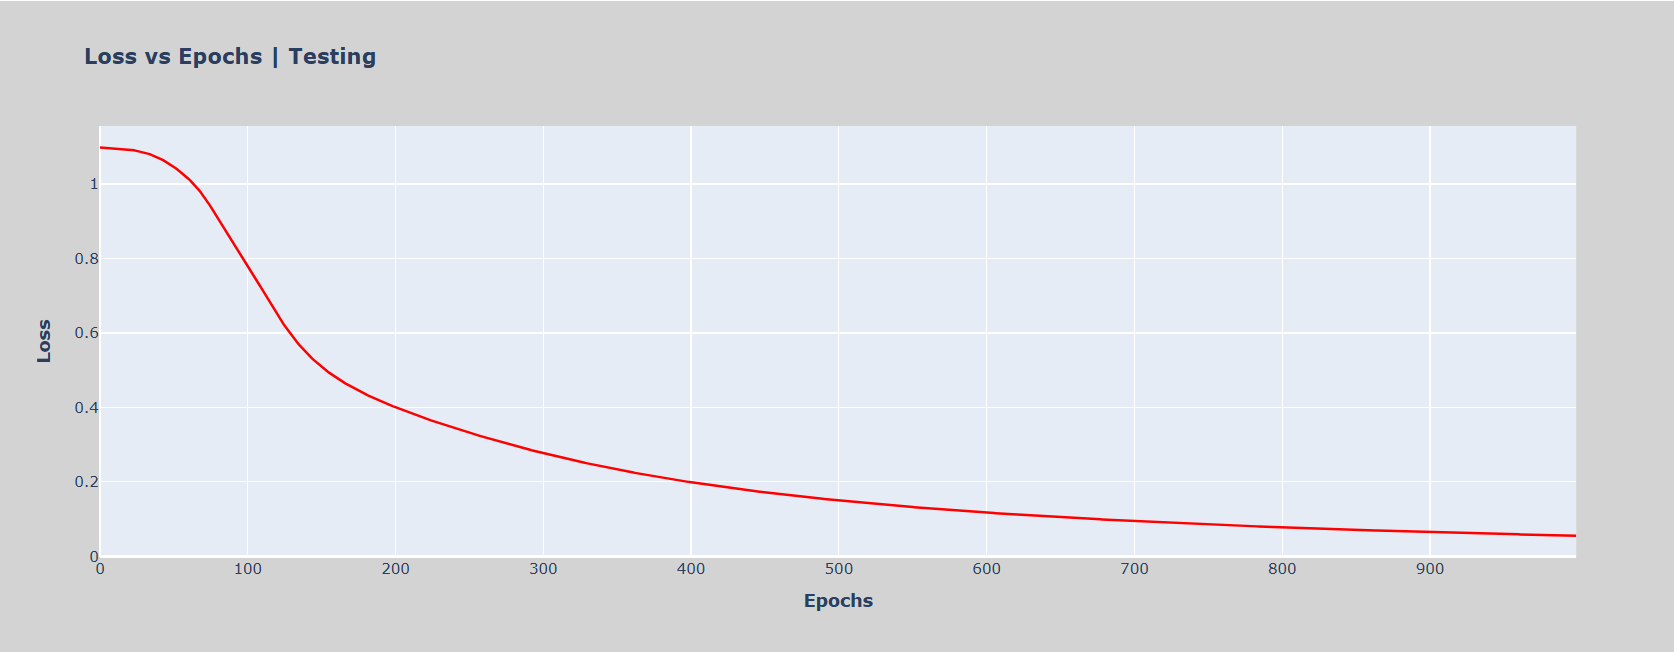

In [ ]:
fig = px.line(x=range(len(nn_test_iris.accuracy_history)),y=nn_test_iris.accuracy_history,title='<b>Training Accuracy vs Epochs | Testing </b>')
fig.update_layout(xaxis_title='<b>Epochs</b>',yaxis_title='<b>Accuracy</b>',paper_bgcolor='lightgray')
fig.update_traces(line_color='green')
fig.show()

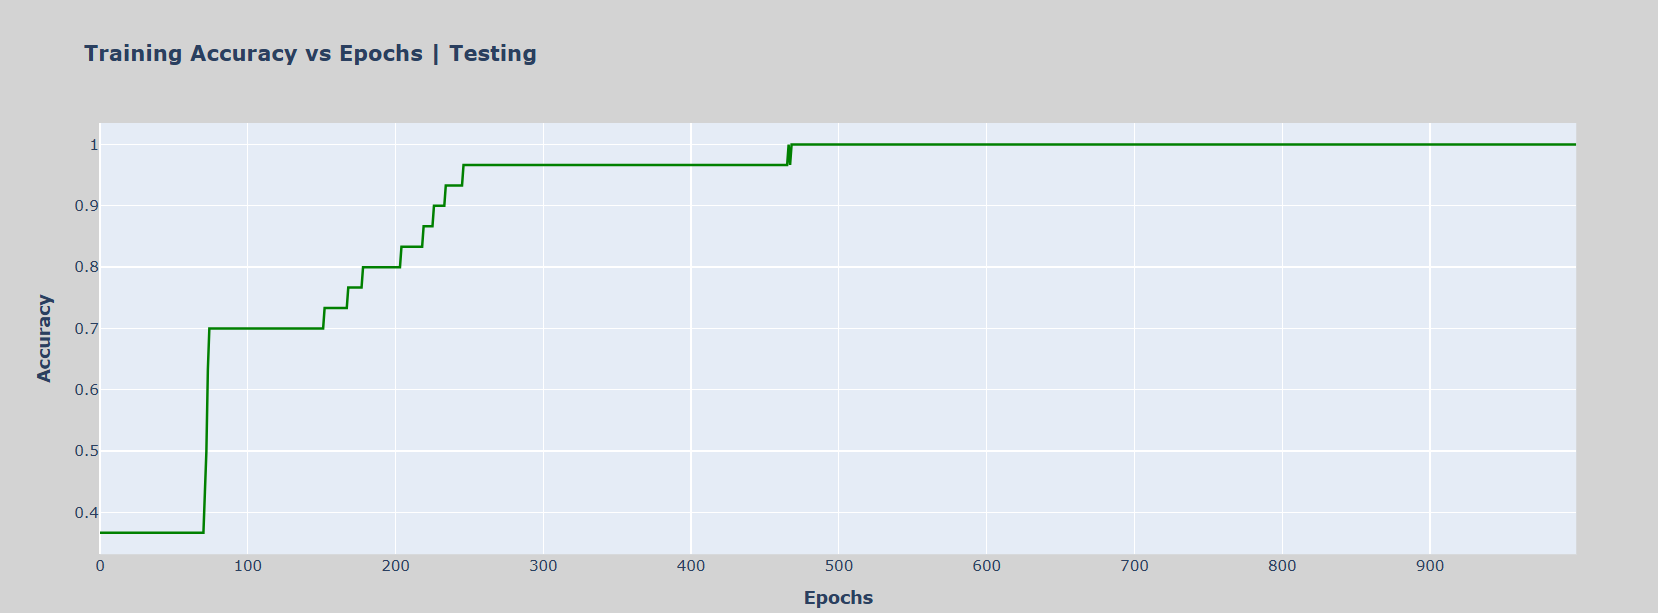